In [1]:
library(caret)
library(pROC)
library(dplyr)

df_original <- read.csv('../cleaned_data/cleaning_data-02.csv')

Loading required package: ggplot2

Loading required package: lattice

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
install.packages('vscDebugger')

Warning message:
"package 'vscDebugger' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"


In [3]:
colnames(df_original)

[1] "BEM_ID"      "P_IDCOR"     "H_IDNUMBER"  "HHNO"        "PERSNO"     
  [6] "RELHEAD"     "A03"         "A07"         "A08"         "A09"        
 [11] "A10A"        "A11"         "A11Y"        "A12"         "A13"        
 [16] "A14"         "A15V1"       "A15V4"       "D1A_6AF"     "D1A_7MF"    
 [21] "D1A_7YF"     "D1A_8F"      "D1A_9F"      "D1A_10CF"    "D1A_1V1F"   
 [26] "D1A_1V3F"    "D1A_1V4F"    "D1A_1V7F"    "D1A_1V8F"    "D1A_1V9F"   
 [31] "D1A_6AL"     "D1A_7ML"     "D1A_7YL"     "D1A_8L"      "D1A_9L"     
 [36] "D1A_10CL"    "D1A_1V1L"    "D1A_1V3L"    "D1A_1V4L"    "D1A_1V7L"   
 [41] "D1A_1V8L"    "D1A_1V9L"    "D1A_4"       "D1A_8YF"     "D1A_8YL"    
 [46] "D1B_6AF"     "D1B_7MF"     "D1B_7YF"     "D1B_8F"      "D1B_9F"     
 [51] "D1B_1V1F"    "D1B_1V4F"    "D1B_1V6F"    "D1B_1V7F"    "D1B_1V8F"   
 [56] "D1B_1V9F"    "D1B_6AL"     "D1B_7ML"     "D1B_7YL"     "D1B_8L"     
 [61] "D1B_9L"      "D1B_1V1L"    "D1B_1V4L"    "D1B_1V6L"    "D1B_1V7L"   
 [66] "D1B_1V8L"    "D1B_1V9L"    "D1B_4"       "D1C_6AF"     "D1C_7MF"    
 [71] "D1C_7YF"     "D1C_8F"      "D1C_9F"      "D1C_10CF"    "D1C_1V1F"   
 [76] "D1C_1V3F"    "D1C_1V4F"    "D1C_1V5F"    "D1C_1V6F"    "D1C_1V7F"   
 [81] "D1C_1V8F"    "D1C_1V9F"    "D1C_6AL"     "D1C_7ML"     "D1C_7YL"    
 [86] "D1C_8L"      "D1C_9L"      "D1C_10CL"    "D1C_1V1L"    "D1C_1V3L"   
 [91] "D1C_1V4L"    "D1C_1V5L"    "D1C_1V6L"    "D1C_1V7L"    "D1C_1V8L"   
 [96] "D1C_1V9L"    "D1C_1V10L"   "D1C_4"       "N1_1V1"      "N1_2"       
[101] "N1_3"        "N1_6U"       "N1_6TAKA"    "N1_7"        "N1_8"       
[106] "N1_9"        "N1_10"       "N1_11"       "N1_12"       "N1_13"      
[111] "N1_14"       "N1_15V1"     "N1_16"       "N1_17"       "O1_1"       
[116] "O1_2"        "O1_3"        "O1_4V1"      "O1_5"        "O1_6"       
[121] "G1_2S1"      "G1_3S1"      "G1_4S1"      "G1_5A1S1"    "G1_6S1"     
[126] "G1_2S2"      "G1_3S2"      "G1_4S2"      "G1_5A1S2"    "G1_6S2"     
[131] "G1_2S3"      "G1_3S3"      "G1_4S3"      "G1_5A1S3"    "G1_6S3"     
[136] "G1_2SIL1"    "G1_3SIL1"    "G1_4SIL1"    "G1_5A1SIL1"  "G1_6SIL1"   
[141] "G2_2S1"      "G2_3S1"      "G2_4S1"      "G2_5A1S1"    "G2_5B1S1"   
[146] "G2_6S1"      "G2_7S1"      "DISTRICT"    "D1A_10AF_3M" "D1A_10AL_3M"
[151] "D1C_10AF_3M" "D1C_10AL_3M" "A05"         "MOUZA_GRP"

In [4]:
dim(df_original)

[1] 23506   154

# Base Model: Logistic Regression

    `   
    `

In [5]:
df1 <-df_original[, c("D1A_1V1L", "A08", "A12", "A13", "A14", "D1A_7ML", "A15V1", "A15V4", "D1A_4", "A11Y" ,"N1_6TAKA", "N1_12", "N1_13", "N1_14", "N1_16", "N1_17", "D1A_10AF_3M", "D1A_10AL_3M", "D1A_8F")]
df1$Age <- 2019 - df1$A08
df1 <-df1[, c("D1A_1V1L", "A12", "A13", "A14", "D1A_7ML", "A15V1", "A15V4", "D1A_4", "A11Y" ,"N1_6TAKA", "N1_12", "N1_13", "N1_14", "N1_16", "N1_17", "D1A_10AF_3M", "D1A_10AL_3M", "D1A_8F")]
# taking out D1A_6AL because too many destinations in list

df1 <-df1[, c("D1A_1V1L", "A12", "A13", "A14", "D1A_7ML", "A15V1", "A15V4", "D1A_4", "A11Y" ,"N1_6TAKA", "N1_12", "N1_13", "N1_14", "N1_16", "N1_17", "D1A_10AF_3M", "D1A_10AL_3M", "D1A_8F")]

df1 <- df1 %>% rename( "Work_Earn_Money" = D1A_1V1L, 
                       "Can_write_letter" = A12, 
                       "Education_Level" = A13, 
                       "Livelihood_Occupation" = A14,
                       "Month_Arrival" = D1A_7ML, 
                       "Migraton_Experience_Internal" = A15V1, 
                       "No_Migration_Experience" = A15V4, 
                       "Number_Trips" = D1A_4, 
                       "Age_First_Marriage" = A11Y,
                       "Paid_in_Taka" = N1_6TAKA, 
                       "Rent_per_Month" = N1_12, 
                       "Food_budget" = N1_13, 
                       "Monthly_Remittances" = N1_14, 
                       "Monthly_Savings" = N1_16, 
                       "Saving_brought_Home" = N1_17, 
                       "Wage_First_Head" = D1A_10AF_3M, 
                       "Wage_Last_Head"= D1A_10AL_3M, 
                       "Duration_of_stay" = D1A_8F)


#converting cateogorical variables to factor
#columns_to_factor <- c("D1A_1V1L", "A12", "A13", "A14", "D1A_7ML", "A15V1", "A15V4")
columns_to_factor <- c("Work_Earn_Money", "Can_write_letter", "Education_Level", "Livelihood_Occupation", "Month_Arrival", "Migraton_Experience_Internal", "No_Migration_Experience")
df1[columns_to_factor] <- lapply(df1[columns_to_factor], factor)

print(head(df1))

  Work_Earn_Money Can_write_letter Education_Level Livelihood_Occupation
1            <NA>                1               4                    14
2            <NA>             <NA>               2                  <NA>
3            <NA>             <NA>            <NA>                  <NA>
4            <NA>                2               2                    17
5            <NA>                1               4                    10
6            <NA>                2               4                    17
  Month_Arrival Migraton_Experience_Internal No_Migration_Experience
1          <NA>                         <NA>                       4
2          <NA>                         <NA>                       4
3          <NA>                         <NA>                       4
4          <NA>                         <NA>                       4
5          <NA>                         <NA>                    <NA>
6          <NA>                            1                    <NA>
  Numb

In [6]:
# converting variables to dummy variables
library("fastDummies")
df1 <- fastDummies::dummy_cols(df1, remove_first_dummy = TRUE, remove_selected_columns = TRUE)
print(dim(df1))
print(head(df1))

Thank you for using fastDummies!

To acknowledge our work, please cite the package:

Kaplan, J. & Schlegel, B. (2023). fastDummies: Fast Creation of Dummy (Binary) Columns and Rows from Categorical Variables. Version 1.7.1. URL: https://github.com/jacobkap/fastDummies, https://jacobkap.github.io/fastDummies/.



[1] 23506    59
  Number_Trips Age_First_Marriage Paid_in_Taka Rent_per_Month Food_budget
1           NA                 NA           NA             NA          NA
2           NA                 NA           NA             NA          NA
3           NA                 NA           NA             NA          NA
4           NA                 13           NA             NA          NA
5           NA                 19           NA             NA          NA
6           NA                 18           NA             NA          NA
  Monthly_Remittances Monthly_Savings Saving_brought_Home Wage_First_Head
1                  NA              NA                  NA              NA
2                  NA              NA                  NA              NA
3                  NA              NA                  NA              NA
4                  NA              NA                  NA              NA
5                  NA              NA                  NA              NA
6                  NA 

In [7]:
# removing rows that do not have D1A_1V1L
df1 <- df1[!is.na(df1$Work_Earn_Money_1), ]

#replace NA with 0, 0 meaning "No", assuming that if the participant did not say yes to a question, than it would be no.
df1 <- replace(df1, is.na(df1), 0)
print(head(df1))

   Number_Trips Age_First_Marriage Paid_in_Taka Rent_per_Month Food_budget
11            1                 29        13000              0       12000
33            1                 21        39800              0        3000
38            4                 23         1000           7000       10000
43            1                 21         6000           1500        2000
50            1                 16            0              0           0
56            1                 26         6000           1000        2000
   Monthly_Remittances Monthly_Savings Saving_brought_Home Wage_First_Head
11                   0            1000                   0           18000
33                   0             300                   0           20000
38               10000            2000               30000               0
43                2000             500                   0            6000
50                   0               0                   0               0
56                2000   

In [8]:
# partitioning the data 
set.seed(123) # for reproducibility
#train_idx <- createDataPartition(df1$D1A_1V1L, p = 0.8, list = FALSE)
train_idx <- createDataPartition(df1$Work_Earn_Money_1, p = 0.8, list = FALSE)
train <- df1[train_idx,]
test <- df1[-train_idx,] 

In [9]:
#trying a logistic regression
model <- glm(Work_Earn_Money_1 ~ ., data = df1, family = binomial(link='logit'))

# look at summary of logistic regression model
(summary2_lm <- summary(model))


Call:
glm(formula = Work_Earn_Money_1 ~ ., family = binomial(link = "logit"), 
    data = df1)

Coefficients: (6 not defined because of singularities)
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -1.108e+01  6.132e+02  -0.018 0.985581    
Number_Trips                     2.102e-01  8.233e-02   2.553 0.010670 *  
Age_First_Marriage              -1.188e-02  1.574e-02  -0.755 0.450284    
Paid_in_Taka                     4.180e-06  2.971e-06   1.407 0.159556    
Rent_per_Month                   1.868e-04  6.995e-05   2.670 0.007590 ** 
Food_budget                     -7.234e-06  3.027e-05  -0.239 0.811126    
Monthly_Remittances              3.018e-04  4.956e-05   6.089 1.13e-09 ***
Monthly_Savings                  6.897e-05  4.061e-05   1.698 0.089426 .  
Saving_brought_Home              1.342e-06  3.328e-06   0.403 0.686694    
Wage_First_Head                 -5.990e-05  3.420e-05  -1.751 0.079872 .  
Wage_Last_Head         

In [10]:
# select the features that are significant for the baseline model and other models

df_model <- df1[ , c('Work_Earn_Money_1', 'Number_Trips', 'Rent_per_Month', 'Monthly_Remittances', 'Wage_Last_Head', 'Duration_of_stay', 'Education_Level_3', 'Education_Level_5', 'Education_Level_6', 'Education_Level_7', 'Education_Level_8', 'Livelihood_Occupation_7', 'Livelihood_Occupation_9', 'Livelihood_Occupation_17')]

set.seed(123) # for reproducibility
train_idx <- createDataPartition(df_model$Work_Earn_Money_1, p = 0.8, list = FALSE)
train <- df_model[train_idx,]
test <- df_model[-train_idx,]

      Predicted
Actual Negative Positive
     0       34       31
     1       10      325


Setting levels: control = 0, case = 1

Setting direction: controls < cases



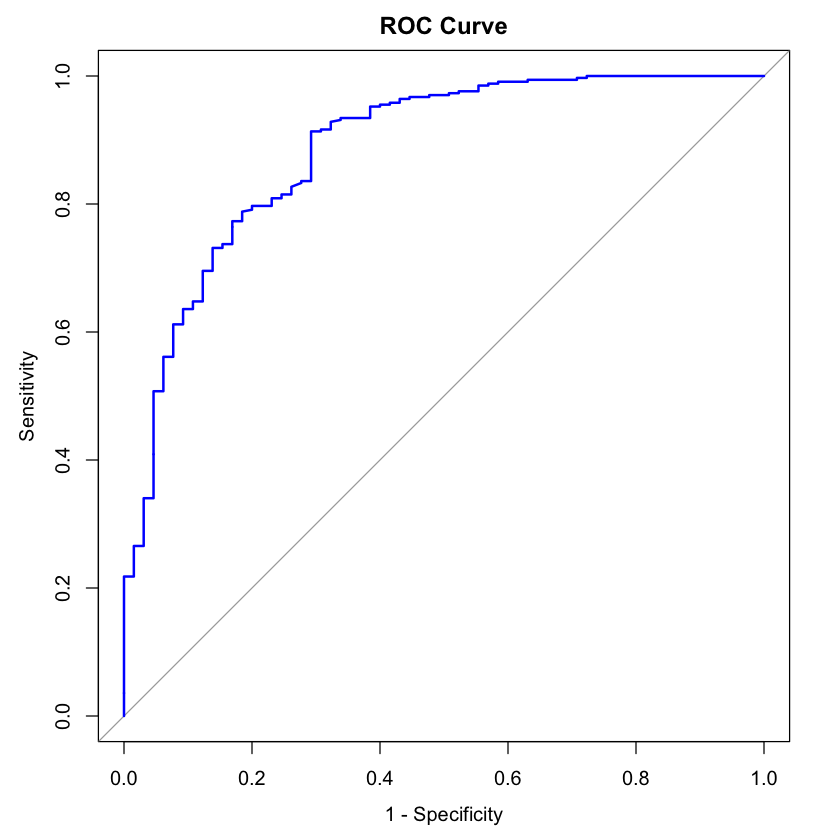

In [11]:
# Create model with predictors found from linear model
#model2 <- glm(Work_Earn_Money_1 ~ D1A_4 + N1_12 + N1_14 + D1A_10AL_3M + D1A_8F + A13_3 + A13_5 + 
                #A13_6 + A13_7 + A13_8 + A14_7 + A14_9 + A14_17, data = train, family = binomial)

# Create model with predictors found from linear model
model2 <- glm(Work_Earn_Money_1 ~ ., data = train, family = binomial(link='logit'))



#model2 <- glm(Work_Earn_Money_1 ~ D1A_4 + N1_12 + N1_14 + D1A_10AL_3M + D1A_8F + A13_3 + A13_5 + 
                #A13_6 + A13_7 + A13_8 + A14_7 + A14_9 + A14_17, data = train, family = binomial)


# Make predictions on test data
predictions <- predict(model2, newdata = test, type = "response")

# Convert probabilities to class labels, assign greater than 0.5 to Positive
pred_classes <- ifelse(predictions > 0.5, "Positive", "Negative")

# Create the confusion matrix
cm <- table(Actual = test$Work_Earn_Money_1, Predicted = pred_classes)

# Confusion Matrix
print(cm)


roc_curve_lr <- roc(test$Work_Earn_Money_1, predictions, legacy.axes = FALSE)

# Plot ROC curve
plot(roc_curve_lr, main = "ROC Curve", col = "blue",  legacy.axes = T) 


# Save AUC
auc_lr <- round(auc(roc_curve_lr), 2)


In [33]:
# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)


TP <- 325
TN <- 34
FP <- 41
FN <- 10


# Calculate accuracy
accuracy <- (TP + TN) / sum(cm)

# Calculate precision
precision <- TP / (TP + FP)

# Calculate recall (also called sensitivity)
recall <- TP / (TP + FN)

# Calculate F1 score
F1 <- 2 * (precision * recall) / (precision + recall)


#Specificity
# Calculate specificity
specificity <- (TN / (TN + FP))

# Calculate AIC
aic <- AIC(model2)

# Calculate BIC
bic <- BIC(model2)

# Print AIC and BIC
print(paste("AIC:", aic))
print(paste("BIC:", bic))



# Print the metrics
cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1 Score:", F1, "\n")
print(paste("Specificity:", specificity))


[1] "AIC: 918.394533143904"


[1] "BIC: 993.683157859094"
Accuracy: 0.8975 
Precision: 0.8879781 
Recall: 0.9701493 
F1 Score: 0.9272468 
[1] "Specificity: 0.453333333333333"


## Feature Selection/Interesting Findings

## Final Conclusions

The following are features are predictors of D1A_1V1L: Internal: Primary purpose of trip: work/earn money - Last, Head.

D1A_4 2.102e-01 8.233e-02 2.553 0.010670 - D1A_4: Internal: Total number of trips - Head

N1_12 1.868e-04 6.995e-05 2.670 0.007590 - N1_12: Internal: Rent per month

N1_14 3.018e-04 4.956e-05 6.089 1.13e-09 \*\*\* -\> N1_14: Internal: Average monthly remittances sent home

D1A_10AL_3M 1.371e-04 3.409e-05 4.021 5.80e-05\*\*\* -\> D1A_10AL_3M: Internal: Wage(taka)- Last, Head Monthly

D1A_8F -1.485e-03 2.789e-04 -5.326 1.01e-07 \*\*\* -\> D1A_8F: Internal: Duration of stay - First, Head

A13_3 -1.055e+00 4.906e-01 -2.150 0.031541\*\*\* \*\*-\> A13: Household: Level of education (Highest level passed) - 3 Class V (Complete PE)

A13_5 -1.523e+00 5.347e-01 -2.849 0.004385\*\* -\> A13: Household: Level of education (Highest level passed) - 5 SSC (Complete SE)

A13_6 -1.947e+00 6.565e-01 -2.965 0.003025 -\> A13: Household: Level of education (Highest level passed) - 6 College (11 and 12 grades)

A13_7 -1.826e+00 5.520e-01 -3.309 0.000936 -\> A13: Household: Level of education (Highest level passed) - 7 HSC (complete HSE)

A13_8 -2.470e+00 5.359e-01 -4.609 4.04e-06 -\> A13: Household: Level of education (Highest level passed) - 8 University level

A14_7 1.500e+00 7.491e-01 2.003 0.045199 -\> A14: Household: Livelihood/occupation - 7 Rickshaw driver/ Brick breaking/Road building/Construction worker/boatman/earth

A14_9 2.427e+00 8.715e-01 2.785 0.005354 -\> 9 Non agricultural worker(factory worker, blue collar service)

A14_17 -2.769e+00 6.844e-01 -4.046 5.21e-05 -\> 17 Homemaker






## Note about AIC and BIC for Ridge, Lasso and Elastic Net
One of the aspects to note for AIC and BIC for ridge, lasso and elastic net regression is that the log liklihood is heavily penalised on basis of the penalty and is modified by the regularisation term and Ridge, Lasso and Elastic Net do not fit in for calculating the standard AIC and BIC values, but assuming it to be a standard regression model and doing it is one of the ways, which shall be followed for all three below.

# Ridge

Setting levels: control = 0, case = 1

Warning message in roc.default(y.test, ridge.pred):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."
Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(y.test, ridge.pred):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."
Setting direction: controls < cases



[1] "Metrics:"
[1] "Sensitivity (True Positive Rate): 0.917808219178082"
[1] "Specificity (True Negative Rate): 0.674418604651163"
[1] "Accuracy: 0.892156862745098"
[1] "Precision (Positive Predictive Value): 0.959885386819484"
[1] "Recall: 0.917808219178082"
[1] "False Positive Rate: 0.325581395348837"
[1] "F1: 0.938375350140056"
[1] "AUC (Area Under Curve): 0.886066728182216"
[1] "AUC (Area Under Curve): 0.886066728182216"


  [[ suppressing 84 column names 's0', 's1', 's2' ... ]]



15 x 84 sparse Matrix of class "dgCMatrix"
                                                                  
(Intercept)               8.385678e-01  8.382639e-01  8.382188e-01
(Intercept)               .             .             .           
Number_Trips              2.324851e-38  5.618277e-05  6.454707e-05
Rent_per_Month            2.308136e-41  5.578948e-08  6.409709e-08
Monthly_Remittances       2.880487e-41  6.968164e-08  8.006785e-08
Wage_Last_Head            7.445401e-42  1.799846e-08  2.067902e-08
Duration_of_stay         -9.695762e-41 -2.351791e-07 -2.703411e-07
Education_Level_3        -5.997023e-38 -1.449509e-04 -1.665353e-04
Education_Level_5         3.124446e-39  7.079255e-06  8.052202e-06
Education_Level_6        -1.557239e-37 -3.772600e-04 -4.335859e-04
Education_Level_7        -6.587286e-38 -1.601058e-04 -1.840992e-04
Education_Level_8        -6.543591e-38 -1.594983e-04 -1.834782e-04
Livelihood_Occupation_7   1.248436e-37  3.025307e-04  3.477130e-04
Livelihood_Occupati

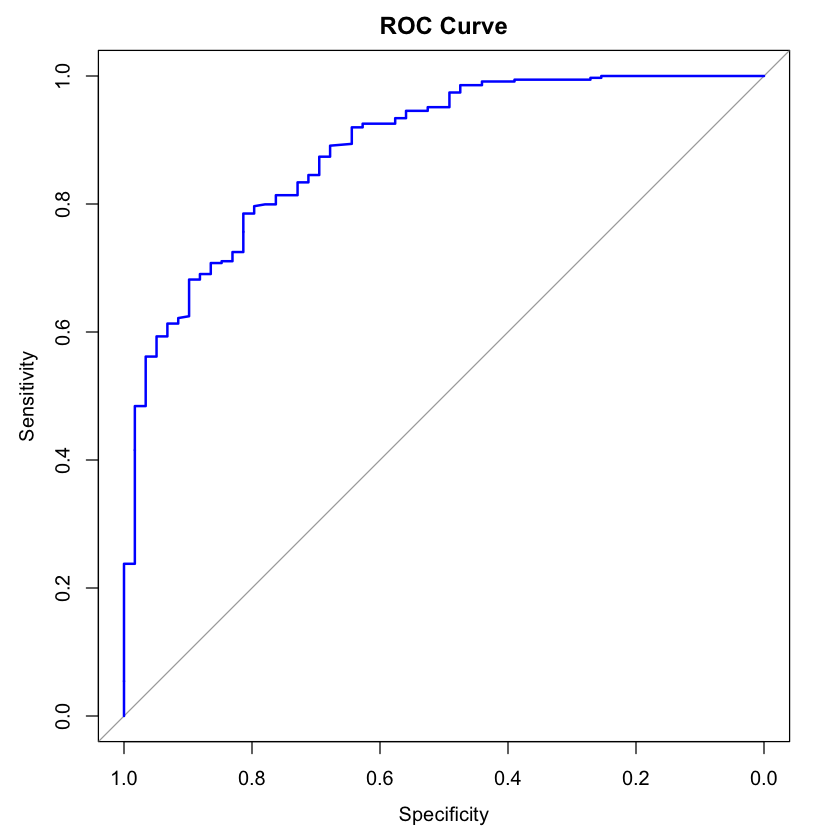

In [35]:
library(glmnet)



# Load your data and prepare x and y
x <- model.matrix(Work_Earn_Money_1 ~ ., df_model)[, ]
y <- df_model$Work_Earn_Money_1

# Split data into train and test sets
set.seed(1)
train <- sample(c(TRUE, FALSE), nrow(df_model), replace = TRUE, prob = c(0.8, 0.2))

test <- !train
y.test <- y[test]

# Train Ridge regression model
ridge.mod <- glmnet(x[train, ], y[train], alpha = 0, lambda.min.ratio = 0.000001)

# Cross-validation for selecting lambda
cv.out <- cv.glmnet(x[train, ], y[train], alpha = 0, lambda.min.ratio = 0.000001)
bestlam <- cv.out$lambda.min

# Predict the test data with the best lambda
ridge.pred <- predict(ridge.mod, s = bestlam, newx = x[test, ])

# Assuming predictions are probabilities, convert them to binary classes
predicted_classes <- ifelse(ridge.pred > 0.5, 1, 0)

# Confusion matrix
conf_matrix <- table(predicted_classes, y.test)

# Calculate Sensitivity (True Positive Rate)
sensitivity <- conf_matrix[2, 2] / sum(conf_matrix[2, ])

# Calculate Specificity (True Negative Rate)
specificity <- conf_matrix[1, 1] / sum(conf_matrix[1, ])

# Calculate Accuracy
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

# Calculate Precision (Positive Predictive Value)
precision <- conf_matrix[2, 2] / sum(conf_matrix[, 2])

# Calculate Recall (Same as Sensitivity)
recall <- sensitivity

F1 <- 2 * (precision * recall) / (precision + recall)


# Calculate False Positive Rate
fpr <- 1 - specificity

# Create ROC Curve

roc_curve_ridge <- roc(y.test, ridge.pred)

# Calculate AUC (Area Under Curve)
auc_value_ridge <- auc(roc_curve_ridge)

roc_curve <- roc(y.test, ridge.pred)

# Calculate AUC (Area Under Curve)
auc_value <- auc(roc_curve)

# Print the metrics
print("Metrics:")
print(paste("Sensitivity (True Positive Rate):", sensitivity))
print(paste("Specificity (True Negative Rate):", specificity))
print(paste("Accuracy:", accuracy))
print(paste("Precision (Positive Predictive Value):", precision))
print(paste("Recall:", recall))
print(paste("False Positive Rate:", fpr))
print(paste("F1:", F1))

print(paste("AUC (Area Under Curve):", auc_value_ridge))

# Plot ROC curve
plot(roc_curve_ridge, main = "ROC Curve", col = "blue")


print(paste("AUC (Area Under Curve):", auc_value))

# Plot ROC curve
plot(roc_curve, main = "ROC Curve", col = "blue")

coef(ridge.mod)


In [45]:
# the number of parameters (nonzero coefficients)
num_params <- sum(coef(ridge.mod) != 0)
print(num_params)

# log likelihood
log_likelihood <- sum(dnorm(y[test], ridge.pred, sd = sqrt(cv.out$cvm)))
print(log_likelihood)

# n observations 
n <- length(y[test])
print(n)
# AIC
aic <- 2 * num_params - 2 * log_likelihood

# BIC
bic <- num_params * log(n) - 2 * log_likelihood

# Print AIC and BIC
print(paste("AIC:", aic))
print(paste("BIC:", bic))


[1] 1176
[1] 399.0766


[1] 408
[1] "AIC: 1553.8467117245"
[1] "BIC: 6271.09690882379"


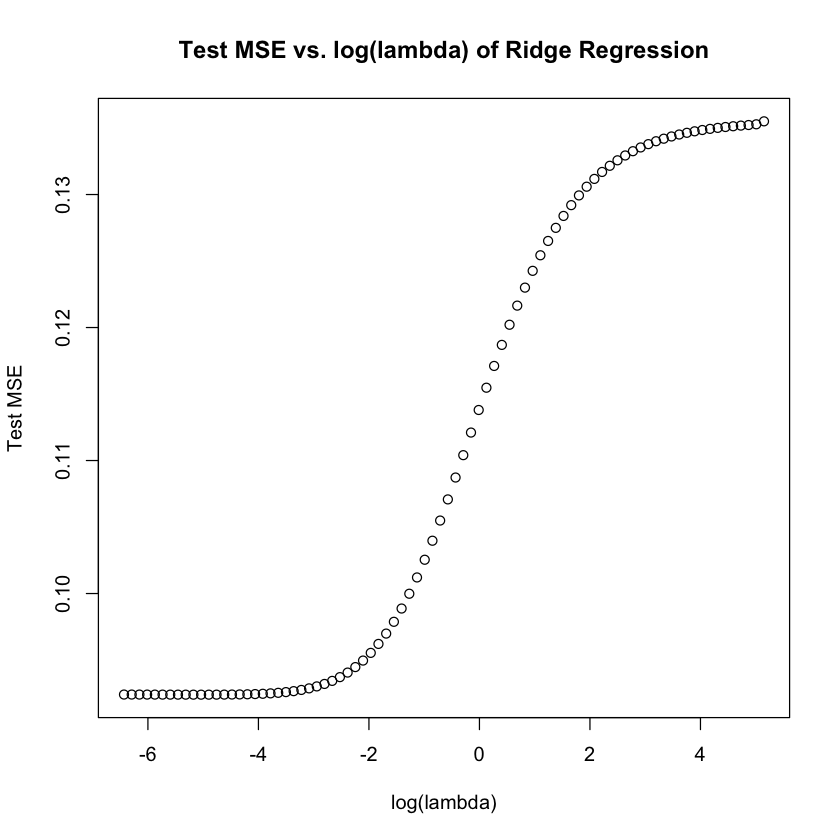

In [14]:
# Call lambda values and corresponding test MSEs
lambda_values <- cv.out$lambda
test_mses <- cv.out$cvm

# Plot the test MSE as a function of the log of the regularization 
# parameter (i.e. log($\lambda$)) for several orders of magnitude.

plot(log(lambda_values), test_mses, type = "b", 
     xlab = "log(lambda)", ylab = "Test MSE",
     main = "Test MSE vs. log(lambda) of Ridge Regression")


# Lasso

Setting levels: control = 0, case = 1

Warning message in roc.default(y[test], lasso.pred):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."
Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(y[test], lasso.pred):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."
Setting direction: controls < cases



[1] "Metrics:"
[1] "Sensitivity (True Positive Rate): 0.917808219178082"
[1] "Specificity (True Negative Rate): 0.674418604651163"
[1] "Accuracy: 0.892156862745098"
[1] "Precision (Positive Predictive Value): 0.959885386819484"
[1] "Recall: 0.917808219178082"
[1] "False Positive Rate: 0.325581395348837"
[1] "F1: 0.938375350140056"
[1] "AUC (Area Under Curve): 0.885095430042251"
[1] "AUC (Area Under Curve): 0.885095430042251"


  [[ suppressing 48 column names 's0', 's1', 's2' ... ]]



15 x 48 sparse Matrix of class "dgCMatrix"
                                                                               
(Intercept)              0.8385678  0.84459594  0.8498389  0.8543989  0.8583650
(Intercept)              .          .           .          .          .        
Number_Trips             .          .           .          .          .        
Rent_per_Month           .          .           .          .          .        
Monthly_Remittances      .          .           .          .          .        
Wage_Last_Head           .          .           .          .          .        
Duration_of_stay         .          .           .          .          .        
Education_Level_3        .          .           .          .          .        
Education_Level_5        .          .           .          .          .        
Education_Level_6        .          .           .          .          .        
Education_Level_7        .          .           .          .          .      

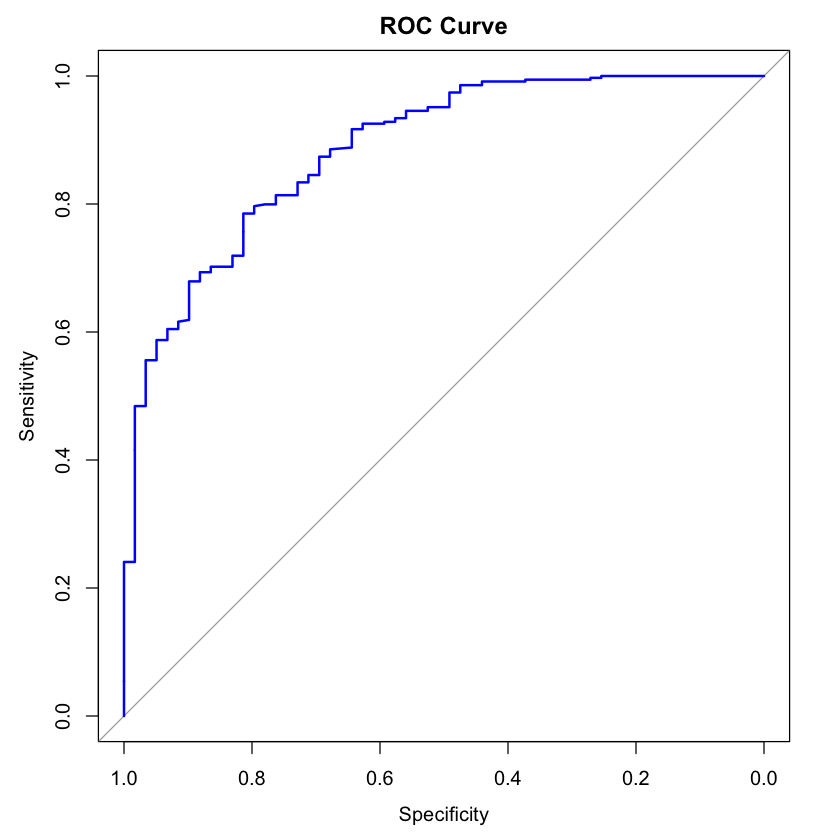

In [15]:
library(glmnet)
library(pROC)

# Train Lasso regression model
lasso.mod <- glmnet(x[train, ], y[train], alpha = 1, lambda.min.ratio = 0.000001)

# Cross-validation for selecting lambda
cv.out <- cv.glmnet(x[train, ], y[train], alpha = 1, lambda.min.ratio = 0.000001)

# Find lambda that minimizes training MSE
bestlam <- cv.out$lambda.min

# Predict the test data with the best lambda
lasso.pred <- predict(lasso.mod, s = bestlam, newx = x[test, ])

# Assuming predictions are probabilities, convert them to binary classes
predicted_classes <- ifelse(lasso.pred > 0.5, 1, 0)

# Confusion matrix
conf_matrix <- table(predicted_classes, y[test])

# Calculate Sensitivity (True Positive Rate)
sensitivity <- conf_matrix[2, 2] / sum(conf_matrix[2, ])

# Calculate Specificity (True Negative Rate)
specificity <- conf_matrix[1, 1] / sum(conf_matrix[1, ])

# Calculate Accuracy
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

# Calculate Precision (Positive Predictive Value)
precision <- conf_matrix[2, 2] / sum(conf_matrix[, 2])

# Calculate Recall (Same as Sensitivity)
recall <- sensitivity

# Calculate False Positive Rate
fpr <- 1 - specificity

F1 <- 2 * (precision * recall) / (precision + recall)


# Create ROC Curve

roc_curve_lasso <- roc(y[test], lasso.pred)

# Calculate AUC (Area Under Curve)
auc_value_lasso <- auc(roc_curve_lasso)

roc_curve <- roc(y[test], lasso.pred)

# Calculate AUC (Area Under Curve)
auc_value <- auc(roc_curve)


# Print the metrics
print("Metrics:")
print(paste("Sensitivity (True Positive Rate):", sensitivity))
print(paste("Specificity (True Negative Rate):", specificity))
print(paste("Accuracy:", accuracy))
print(paste("Precision (Positive Predictive Value):", precision))
print(paste("Recall:", recall))
print(paste("False Positive Rate:", fpr))
print(paste("F1:", F1))
print(paste("AUC (Area Under Curve):", auc_value_lasso))

# Plot ROC curve
plot(roc_curve_lasso, main = "ROC Curve", col = "blue")

# Save AUC
auc_lasso <- round(auc(roc_curve_lasso), 2)


print(paste("AUC (Area Under Curve):", auc_value))

# Plot ROC curve
plot(roc_curve, main = "ROC Curve", col = "blue")

coef(lasso.mod)


In [48]:
n <- length(y[test])
rss_lasso <- sum((y[test] - as.vector(lasso.pred))^2)
logLikelihood_lasso <- -n/2 * (log(2 * pi * rss_lasso / n) + 1)
non_zero_coefs_lasso <- sum(coef(lasso.mod, s = bestlam)[-1] != 0)  
aic_lasso <- 2 * non_zero_coefs_lasso - 2 * logLikelihood_lasso
bic_lasso <- log(n) * non_zero_coefs_lasso - 2 * logLikelihood_lasso

cat(sprintf("Lasso AIC: %.2f\n", aic_lasso))
cat(sprintf("Lasso BIC: %.2f\n", bic_lasso))


Lasso AIC: 178.45
Lasso BIC: 230.60


In [16]:
library(caret)
library(pROC)
library(glmnet)
library(rpart)

library(e1071)  
library(class) 


evaluate_model <- function(model, actual, predicted_prob, threshold = 0.5, plot_roc = TRUE, show_summary = FALSE) {
  predicted_classes <- ifelse(predicted_prob > threshold, 1, 0)
  confusion <- confusionMatrix(as.factor(predicted_classes), as.factor(actual), positive = "1")


  roc_result <- roc(actual, predicted_prob)
  auc_value <- auc(roc_result)


  if (plot_roc) {
    plot(roc_result, main = "ROC Curve")
    abline(a = 0, b = 1, col = "red")  # Adding a reference line
    text(x = 0.8, y = 0.2, labels = paste("AUC =", round(auc_value, 2)))
  }
  
  # Optionally print model summary
  if (show_summary && !is.null(model)) {
    print(summary(model))
  }
  

  list(
    Accuracy = confusion$overall['Accuracy'],
    Precision = confusion$byClass['Precision'],
    Recall = confusion$byClass['Sensitivity'], 
    Specificity = confusion$byClass['Specificity'],
    AUC = auc_value,
    ROC = roc_result
  )
}

#set.seed(123) # for reproducibility
#train_idx <- createDataPartition(df1$Work_Earn_Money_1, p = 0.8, list = FALSE)
#train_set <- df1[train_idx, ]
#test_set <- df1[-train_idx, ]

# Elastic

Setting levels: control = 0, case = 1

Warning message in roc.default(y[test], elastic.pred):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."
Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(y[test], elastic.pred):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."
Setting direction: controls < cases



[1] "Metrics:"
[1] "Sensitivity (True Positive Rate): 0.917808219178082"
[1] "Specificity (True Negative Rate): 0.674418604651163"
[1] "Accuracy: 0.892156862745098"
[1] "Precision (Positive Predictive Value): 0.959885386819484"
[1] "Recall: 0.917808219178082"
[1] "False Positive Rate: 0.325581395348837"
[1] "AUC (Area Under Curve): 0.89"
[1] "FI 0.938375350140056"
[1] "AUC (Area Under Curve): 0.88514399494925"


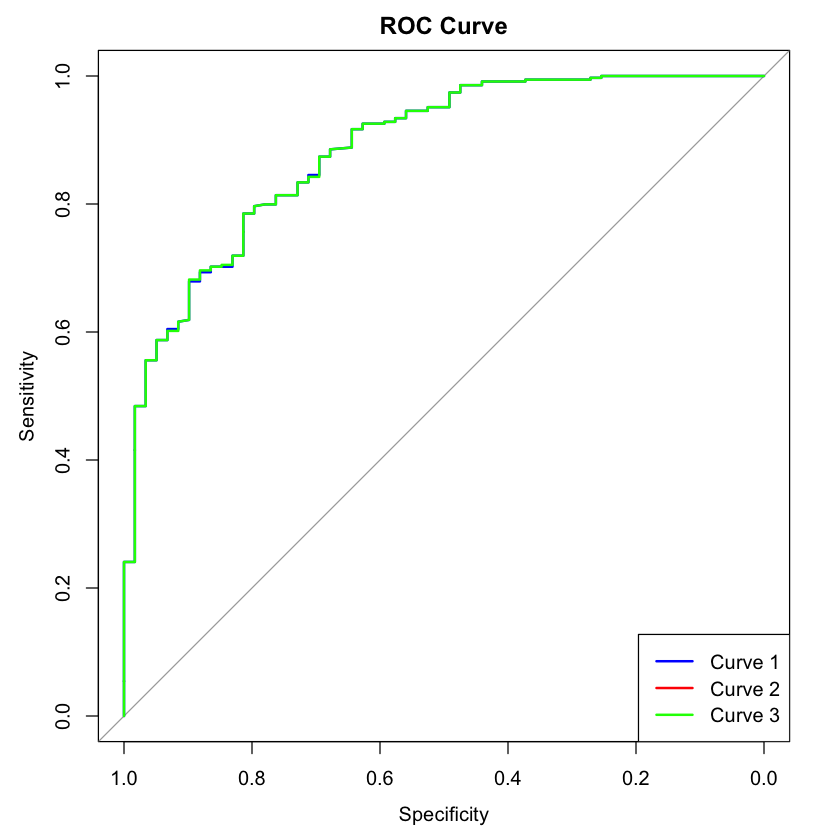

  [[ suppressing 48 column names 's0', 's1', 's2' ... ]]



15 x 48 sparse Matrix of class "dgCMatrix"
                                                                               
(Intercept)              0.8385678  0.84285047  0.8468891  0.8506682  0.8541789
(Intercept)              .          .           .          .          .        
Number_Trips             .          .           .          .          .        
Rent_per_Month           .          .           .          .          .        
Monthly_Remittances      .          .           .          .          .        
Wage_Last_Head           .          .           .          .          .        
Duration_of_stay         .          .           .          .          .        
Education_Level_3        .          .           .          .          .        
Education_Level_5        .          .           .          .          .        
Education_Level_6        .          .           .          .          .        
Education_Level_7        .          .           .          .          .      

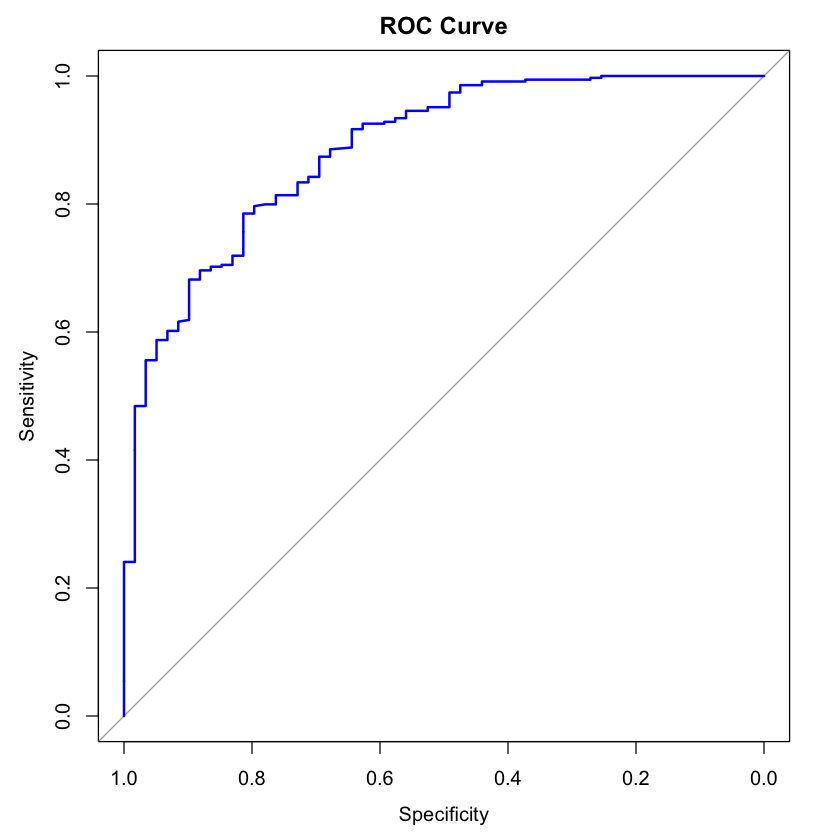

In [17]:
library(glmnet)
library(pROC)

# Train Elastic Net regression model
elastic.mod <- glmnet(x[train, ], y[train], alpha = 0.5, lambda.min.ratio = 0.000001)

# Cross-validation for selecting lambda
cv.out <- cv.glmnet(x[train, ], y[train], alpha = 0.5, lambda.min.ratio = 0.000001)

# Find lambda that minimizes training MSE
bestlam <- cv.out$lambda.min

# Predict the test data with the best lambda
elastic.pred <- predict(elastic.mod, s = bestlam, newx = x[test, ])

# Assuming predictions are probabilities, convert them to binary classes
predicted_classes <- ifelse(elastic.pred > 0.5, 1, 0)

# Confusion matrix
conf_matrix <- table(predicted_classes, y[test])

# Calculate Sensitivity (True Positive Rate)
sensitivity <- conf_matrix[2, 2] / sum(conf_matrix[2, ])

# Calculate Specificity (True Negative Rate)
specificity <- conf_matrix[1, 1] / sum(conf_matrix[1, ])

# Calculate Accuracy
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

# Calculate Precision (Positive Predictive Value)
precision <- conf_matrix[2, 2] / sum(conf_matrix[, 2])

# Calculate Recall (Same as Sensitivity)
recall <- sensitivity

# Calculate False Positive Rate
fpr <- 1 - specificity


F1 <- 2 * (precision * recall) / (precision + recall)

# Create ROC Curve
roc_curve_elastic <- roc(y[test], elastic.pred)

# Calculate AUC (Area Under Curve)
auc_elastic <- round(auc(roc_curve_elastic), 2)
roc_curve <- roc(y[test], elastic.pred)

# Calculate AUC (Area Under Curve)
auc_value <- auc(roc_curve)

# Print the metrics
print("Metrics:")
print(paste("Sensitivity (True Positive Rate):", sensitivity))
print(paste("Specificity (True Negative Rate):", specificity))
print(paste("Accuracy:", accuracy))
print(paste("Precision (Positive Predictive Value):", precision))
print(paste("Recall:", recall))
print(paste("False Positive Rate:", fpr))
print(paste("AUC (Area Under Curve):", auc_elastic))
print(paste("FI", F1))

# Plot ROC curve
plot(roc_curve_lasso, main = "ROC Curve", col = "blue", lwd = 2)
plot(roc_curve_elastic, main = "ROC Curve", col = "green", add=TRUE)

# Add a legend
legend("bottomright", legend = c("Curve 1", "Curve 2", "Curve 3"),
       col = c("blue", "red", "green"), lty = 1, lwd = 2)
print(paste("AUC (Area Under Curve):", auc_value))

# Plot ROC curve
plot(roc_curve, main = "ROC Curve", col = "blue")

coef(elastic.mod)


[1] "Report Test Error:"
Elastic Net MSE: 0.08502231 
[1] "Elastic Net Regression combines Lasso and Ridge regularization."


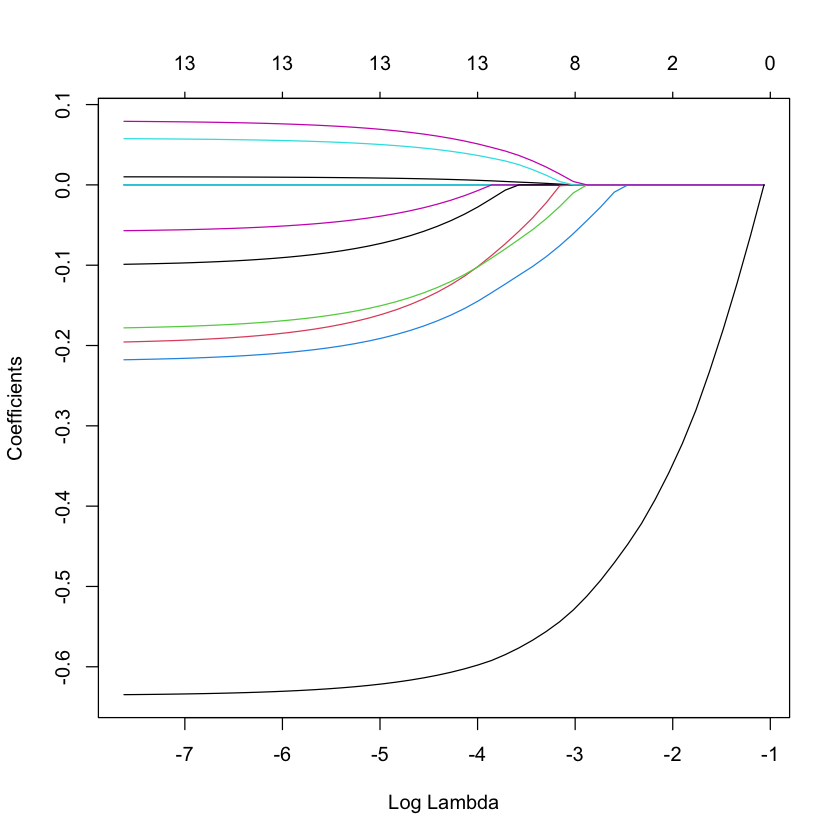

In [18]:
library(glmnet)


# Calculate the test MSE
elastic_mse <- mean((elastic.pred - y[test])^2)

# Print and report test error
print("Report Test Error:")
cat("Elastic Net MSE:", elastic_mse, "\n")
print("Elastic Net Regression combines Lasso and Ridge regularization.")

# Plot of non-zero coefficient estimates
plot(elastic.mod, xvar = "lambda")

# Get final model with selected lambda
elastic.mod.final <- glmnet(x[train, ], y[train], alpha = 0.5, lambda = bestlam)

# Sparse matrix

In [47]:
# (RSS)
rss <- sum((y[test] - as.vector(elastic.pred))^2)

# log-likelihood for Gaussian errors
n <- length(y[test]) 
logLikelihood <- -n/2 * (log(2 * pi * rss / n) + 1)

# non-zero coefficients
non_zero_coefs <- sum(coef(elastic.mod, s = bestlam)[-1] != 0)  # Excluding intercept

#  AIC
aic_elastic <- 2 * non_zero_coefs - 2 * logLikelihood

#  BIC
bic_elastic <- log(n) * non_zero_coefs - 2 * logLikelihood

cat(sprintf("Estimated AIC for Elastic Net: %.2f\n", aic_elastic))
cat(sprintf("Estimated BIC for Elastic Net: %.2f\n", bic_elastic))


Estimated AIC for Elastic Net: 178.20
Estimated BIC for Elastic Net: 230.34


From Line 487 in feature_select_r_sheeba.qmd

# Note about Feature Selection

Feature selection was performed on logistic regression model. Then the selected features were used for Ridge, Lasso, and Elastic. Feature selection was not repeated on ensemble methods to see if ensemble methods prioritized different features in the models.


# Decision Tree

Setting levels: control = 0, case = 1

Setting direction: controls < cases



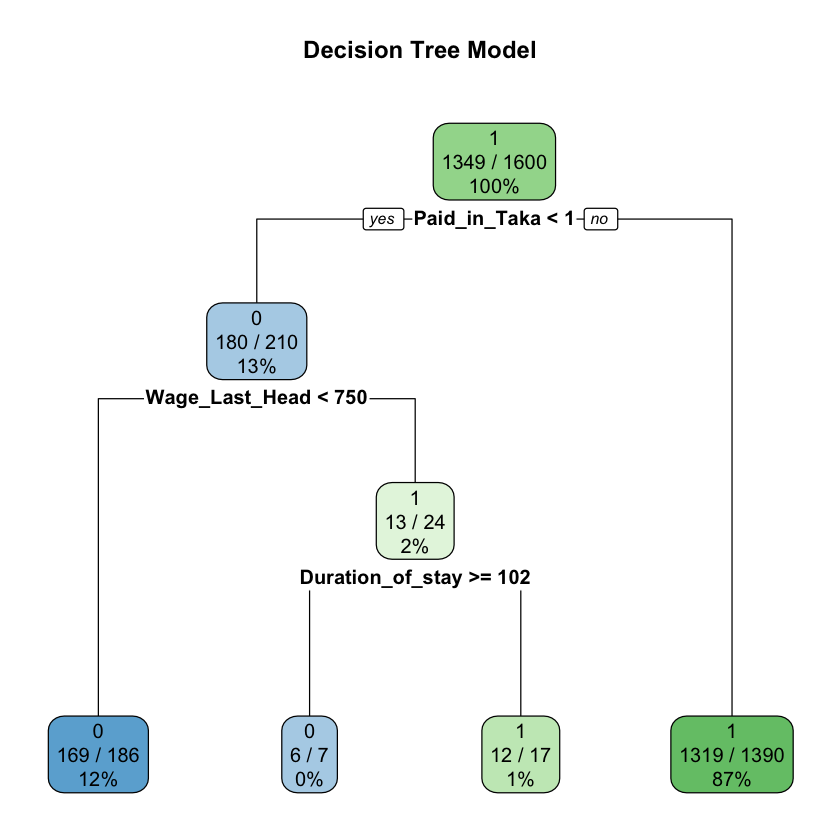

Call:
rpart(formula = Work_Earn_Money_1 ~ ., data = train, method = "class")
  n= 1600 

          CP nsplit rel error    xerror       xstd
1 0.59760956      0 1.0000000 1.0000000 0.05795743
2 0.01394422      1 0.4023904 0.4063745 0.03893340
3 0.01000000      3 0.3745020 0.4262948 0.03980962

Variable importance
            Paid_in_Taka Livelihood_Occupation_17              Food_budget 
                      72                       16                        6 
          Wage_Last_Head          Wage_First_Head         Duration_of_stay 
                       3                        3                        1 

Node number 1: 1600 observations,    complexity param=0.5976096
  predicted class=1  expected loss=0.156875  P(node) =1
    class counts:   251  1349
   probabilities: 0.157 0.843 
  left son=2 (210 obs) right son=3 (1390 obs)
  Primary splits:
      Paid_in_Taka             < 1    to the left,  improve=237.07340, (0 missing)
      Livelihood_Occupation_17 < 0.5  to the right, i

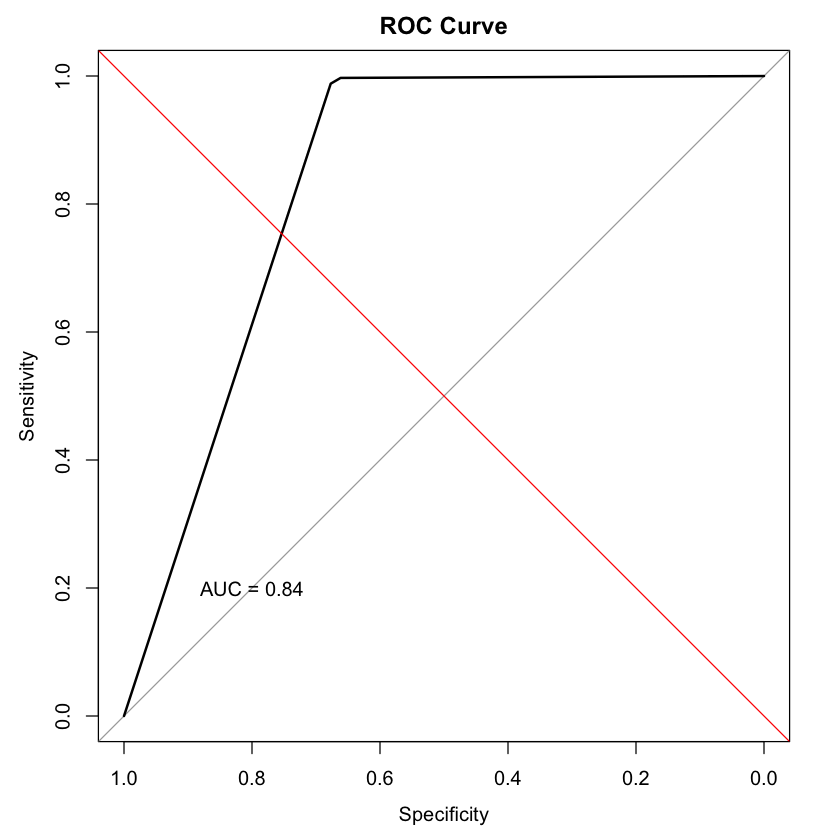

In [19]:
set.seed(123) # for reproducibility

train_idx <- createDataPartition(df1$Work_Earn_Money_1, p = 0.8, list = FALSE)
train <- df1[train_idx,]
test <- df1[-train_idx,] 

tree_model <- rpart(Work_Earn_Money_1 ~ ., data = train, method = "class")
library(rpart.plot)

rpart.plot(tree_model, main="Decision Tree Model", extra=102)  # extra=102 to show node numbers and splits
predictions_prob <- predict(tree_model, newdata = test, type = "prob")
results <- evaluate_model(tree_model, test$Work_Earn_Money_1, predictions_prob[,2], plot_roc = TRUE, show_summary = TRUE)

print(results)

# Decision Tree (Hyperparameter Tuned)

In [20]:
library(rpart)
control <- rpart.control(minsplit = 20, minbucket = 7, maxdepth=30)
fit <- rpart(Work_Earn_Money_1 ~ ., data=train, method="class", control=control)

## Decision Tree Plot

Setting levels: control = 0, case = 1

Setting direction: controls < cases



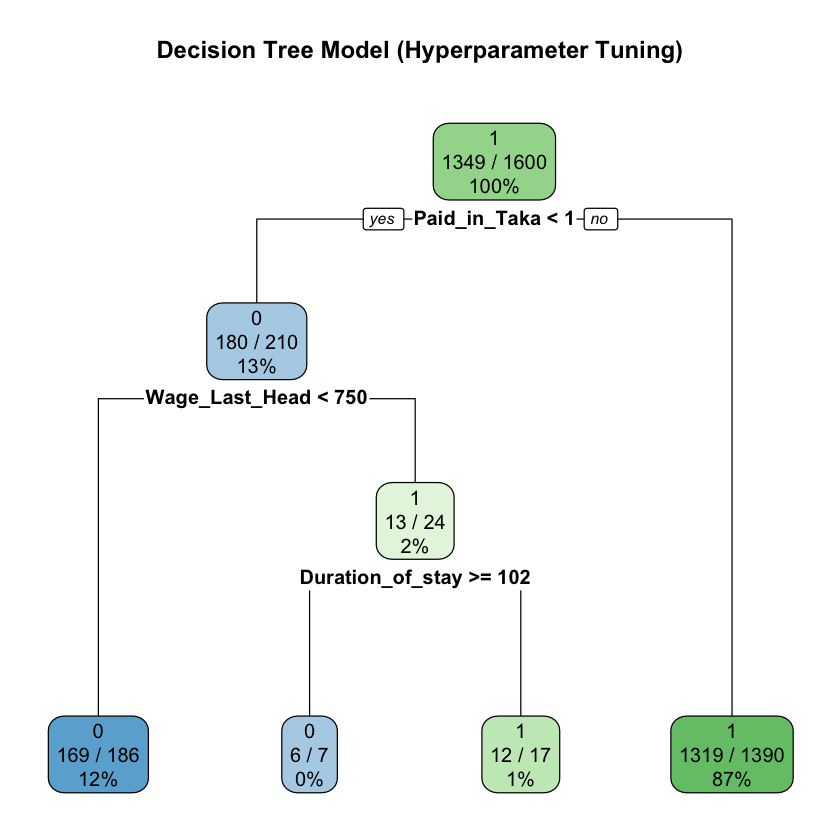

Call:
rpart(formula = Work_Earn_Money_1 ~ ., data = train, method = "class", 
    control = control)
  n= 1600 

          CP nsplit rel error    xerror       xstd
1 0.59760956      0 1.0000000 1.0000000 0.05795743
2 0.01394422      1 0.4023904 0.4023904 0.03875500
3 0.01000000      3 0.3745020 0.4143426 0.03928699

Variable importance
            Paid_in_Taka Livelihood_Occupation_17              Food_budget 
                      72                       16                        6 
          Wage_Last_Head          Wage_First_Head         Duration_of_stay 
                       3                        3                        1 

Node number 1: 1600 observations,    complexity param=0.5976096
  predicted class=1  expected loss=0.156875  P(node) =1
    class counts:   251  1349
   probabilities: 0.157 0.843 
  left son=2 (210 obs) right son=3 (1390 obs)
  Primary splits:
      Paid_in_Taka             < 1    to the left,  improve=237.07340, (0 missing)
      Livelihood_Occupation_1

Setting levels: control = 0, case = 1

Setting direction: controls < cases



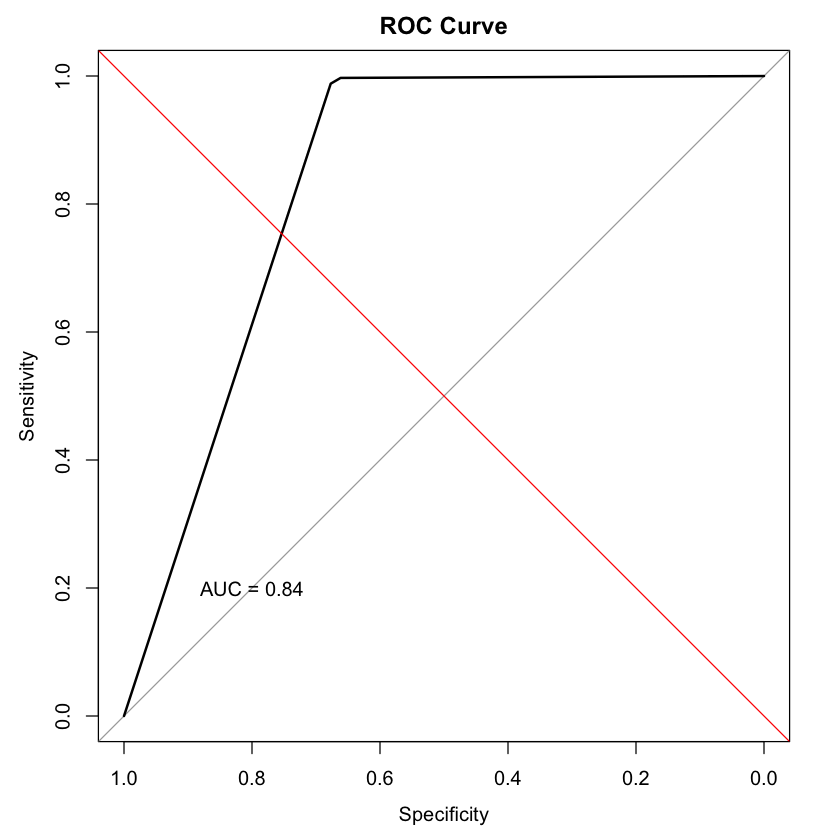

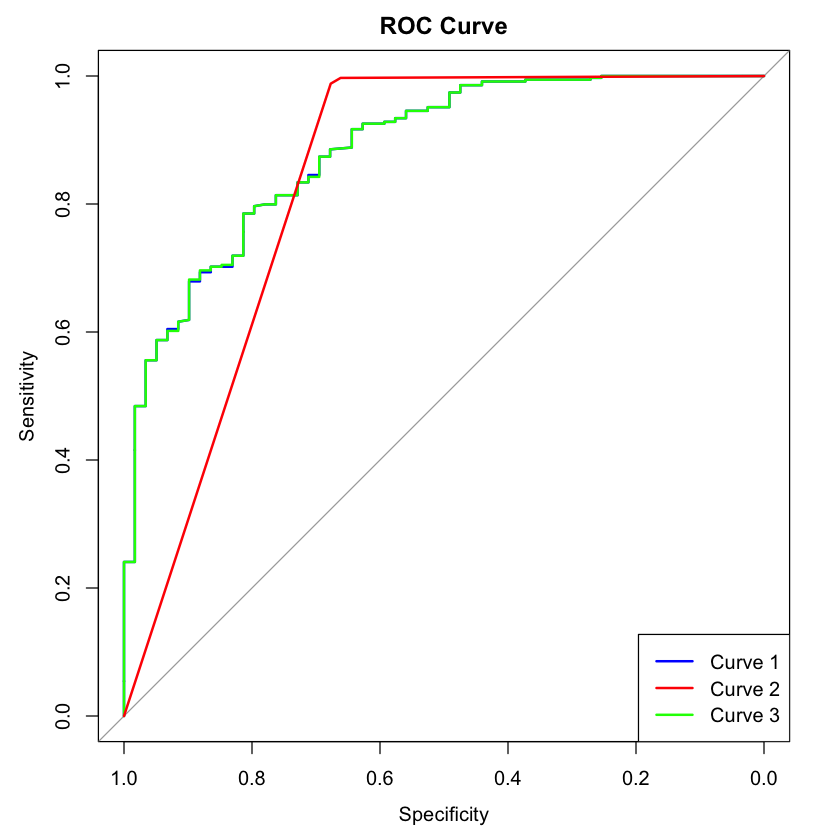

In [21]:
rpart.plot(fit, main="Decision Tree Model (Hyperparameter Tuning)", extra=102)  # extra=102 to show node numbers and splits
predictions_prob_rf <- predict(fit, newdata = test, type = "prob")
results <- evaluate_model(fit, test$Work_Earn_Money_1, predictions_prob_rf[,2], plot_roc = TRUE, show_summary = TRUE)


roc_curve_decision <- roc(test$Work_Earn_Money_1, predictions_prob_rf[, 2])
# Save AUC
auc_decision <- round(results$Accuracy, 2)

# Plot ROC curve
plot(roc_curve_lasso, main = "ROC Curve", col = "blue", lwd = 2)
plot(roc_curve_elastic, main = "ROC Curve", col = "green", add=TRUE)
plot(roc_curve_decision, main = "ROC Curve", col = "red", add=TRUE)

# Add a legend
legend("bottomright", legend = c("Curve 1", "Curve 2", "Curve 3"),
       col = c("blue", "red", "green"), lty = 1, lwd = 2)

## Decision Tree with Hyperparameter tuning results

In [22]:
specificity <- results$Specificity
accuracy <- results$Accuracy
sensitivities <- results$Recall
precision <- results$Precision

print(specificity)
print(accuracy)
print(sensitivities)
print(precision)


Specificity 
  0.6615385 
Accuracy 
  0.9425 
Sensitivity 
  0.9970149 
Precision 
0.9382022 


# Random Forest

In [23]:
library(randomForest)
library(datasets)
library(caret)

train_idx <- createDataPartition(df1$Work_Earn_Money_1, p = 0.8, list = FALSE)
train <- df1[train_idx,]
test <- df1[-train_idx,] 

train$Work_Earn_Money_1 <- factor(train$Work_Earn_Money_1)
test$Work_Earn_Money_1 <- factor(test$Work_Earn_Money_1)

rf <- randomForest(Work_Earn_Money_1~., data=train, type='classification', proximity=TRUE, importance=TRUE)
print(rf)

rf_predict <- predict(rf, newdata=test, type='prob')

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin





Call:
 randomForest(formula = Work_Earn_Money_1 ~ ., data = train, type = "classification",      proximity = TRUE, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 7

        OOB estimate of  error rate: 5.94%
Confusion matrix:
    0    1 class.error
0 179   73  0.28968254
1  22 1326  0.01632047


In [24]:
# with mtry
TN <- 173
FP <- 80
FN <- 16
TP <- 1331

# Calculate metrics
accuracy <- (TP + TN) / (TP + TN + FP + FN)
precision <- TP / (TP + FP)
recall <- TP / (TP + FN)  # Also known as sensitivity
specificity <- TN / (TN + FP)

# Calculate recall (also called sensitivity)
recall <- TP / (TP + FN)

# Print the results
cat(sprintf("Accuracy: %f\n", accuracy))
cat(sprintf("Precision: %f\n", precision))
cat(sprintf("Recall (Sensitivity): %f\n", recall))
cat(sprintf("Specificity: %f\n", specificity))
cat(sprintf("Sensitivity: %f\n", recall))

Accuracy: 0.940000
Precision: 0.943303
Recall (Sensitivity): 0.988122
Specificity: 0.683794
Sensitivity: 0.988122


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



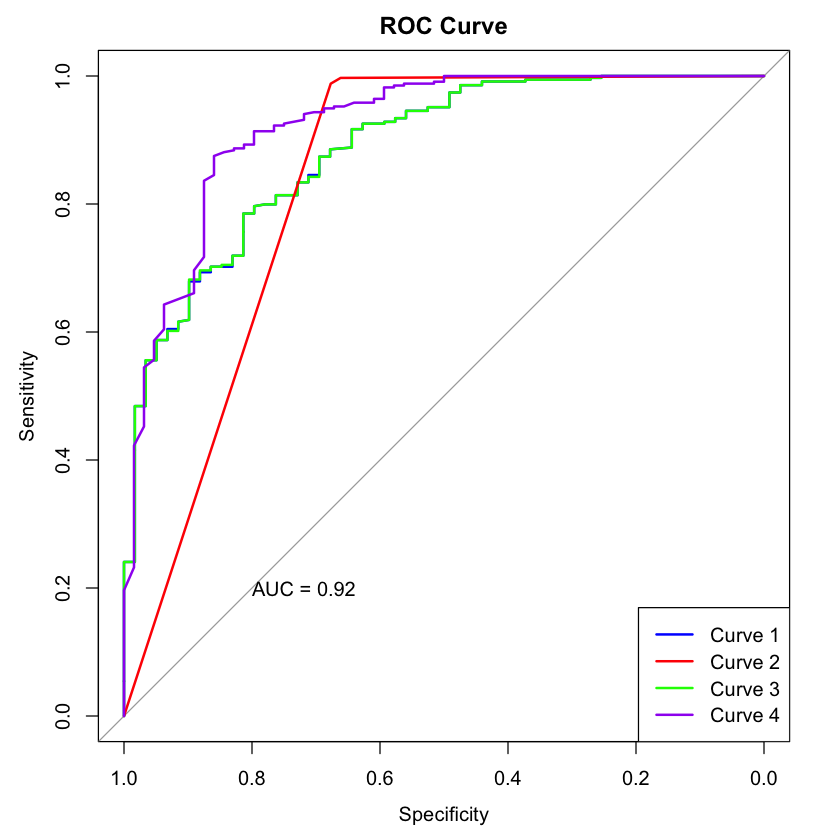

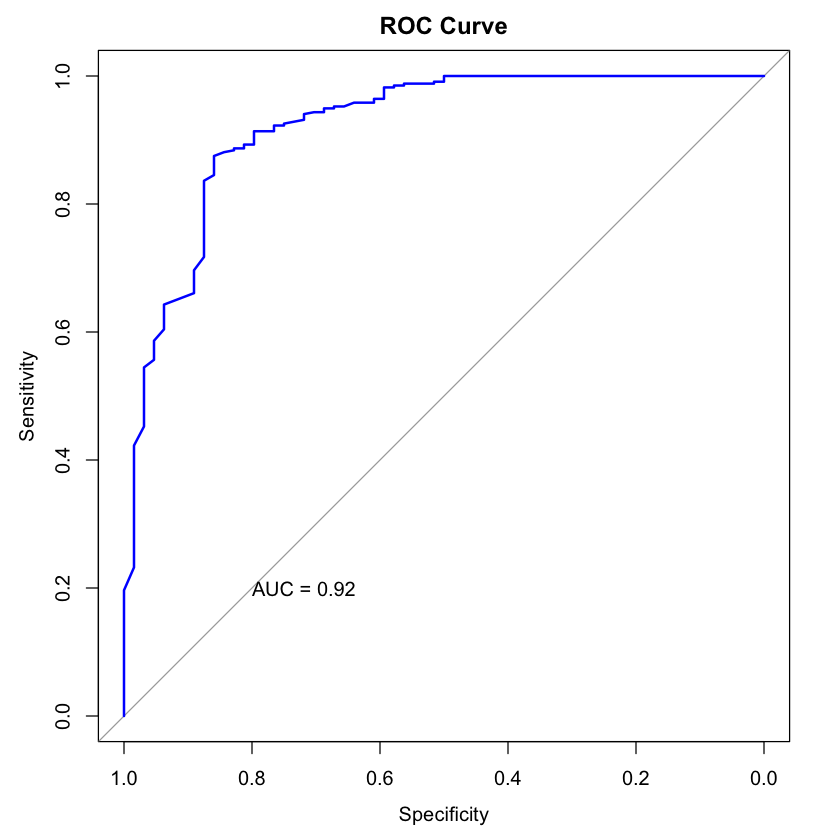

In [25]:
library(pROC)

# Extracting the probabilities of the positive class (assuming it's the first class)
prob_positive_class <- rf_predict[, "1"]

# Compute ROC curve
roc_curve_random <- roc(test$Work_Earn_Money_1, prob_positive_class)
# Save AUC
auc_random <- round(auc(roc_curve_random), 2)


# Plot ROC curve
plot(roc_curve_lasso, main = "ROC Curve", col = "blue", lwd = 2)
plot(roc_curve_elastic, main = "ROC Curve", col = "green", add=TRUE)
plot(roc_curve_decision, main = "ROC Curve", col = "red", add=TRUE)

plot(roc_curve_random, main = "ROC Curve", col = "purple", add=TRUE)
# Add AUC value to the plot


# Add a legend
legend("bottomright", legend = c("Curve 1", "Curve 2", "Curve 3", "Curve 4"),
       col = c("blue", "red", "green", "purple"), lty = 1, lwd = 2)
text(0.8, 0.2, paste("AUC =", round(auc(roc_curve_random), 2)), adj = 0)

roc_curve <- roc(test$Work_Earn_Money_1, prob_positive_class)

# Plot ROC curve
plot(roc_curve, main = "ROC Curve", col = "blue")
# Add AUC value to the plot
text(0.8, 0.2, paste("AUC =", round(auc(roc_curve), 2)), adj = 0)

## Variable Importance


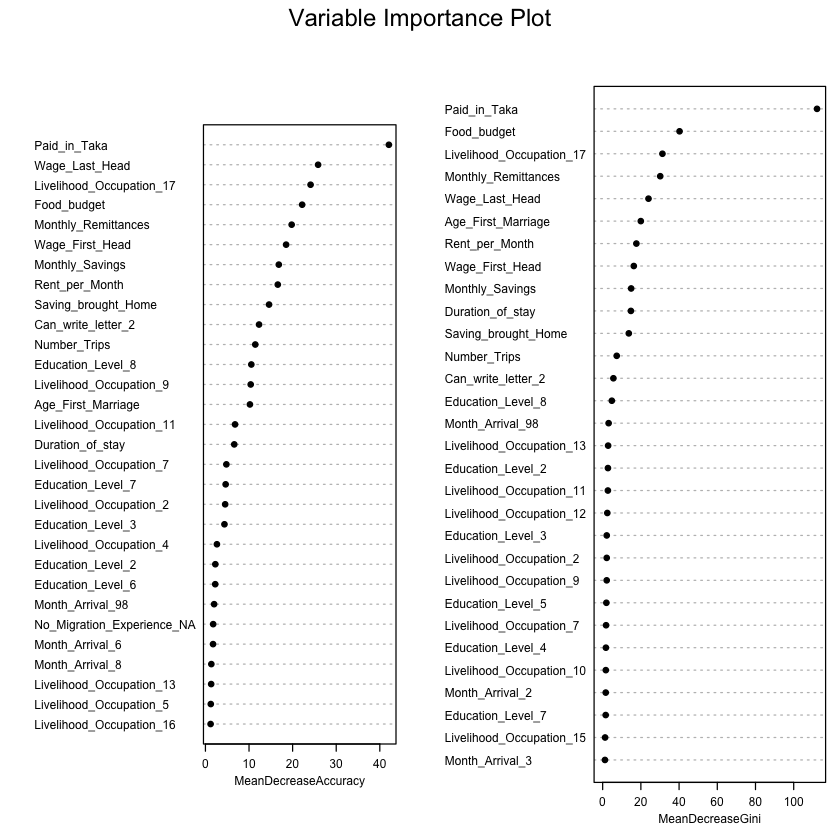

In [26]:
# Plot variable importance
varImpPlot(rf, main = "Variable Importance Plot", cex = 0.6, pch = 19)

# XG Boost


In [27]:
library(xgboost)
library(caTools)
library(dplyr)
library(caret)

set.seed(42)

train_idx <- createDataPartition(df1$Work_Earn_Money_1, p = 0.8, list = FALSE)
train <- df1[train_idx,]
test <- df1[-train_idx,] 


# Split the dataset into training and testing sets
X_train <- df1[train_idx, -which(names(df1) == "Work_Earn_Money_1")]  # Exclude the target variable from the training set
y_train <- df1[train_idx, "Work_Earn_Money_1"]   # Extract the target variable for the training set

X_test <- df1[-train_idx, -which(names(df1) == "Work_Earn_Money_1")]  # Exclude the target variable from the testing set
y_test <- df1[-train_idx, "Work_Earn_Money_1"]   # Extract the target variable for the testing set


xgb_train <- xgb.DMatrix(data = as.matrix(X_train), label = y_train)
xgb_test <- xgb.DMatrix(data = as.matrix(X_test), label = y_test)
xgb_params <- list(
  booster = "gbtree",
  eta = 0.01,
  max_depth = 2,
  gamma = 4,
  subsample = 0.75,
  colsample_bytree = 1,
  objective = "binary:logistic",
  eval_metric = "mlogloss",
  num_class = length(levels(df1$D1A_1V1L))
)

xgb_model <- xgb.train(
  params = xgb_params,
  data = xgb_train,
  nrounds = 5000,
  verbose = 1
)
xgb_model


Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice




##### xgb.Booster
raw: 4.2 Mb 
call:
  xgb.train(params = xgb_params, data = xgb_train, nrounds = 5000, 
    verbose = 1)
params (as set within xgb.train):
  booster = "gbtree", eta = "0.01", max_depth = "2", gamma = "4", subsample = "0.75", colsample_bytree = "1", objective = "binary:logistic", eval_metric = "mlogloss", num_class = "0", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
# of features: 58 
niter: 5000
nfeatures : 58 

In [28]:
# Make predictions on the test set
predictions <- predict(xgb_model, xgb_test)

# Convert probabilities to class labels, assign greater than 0.5 to Positive
pred_classes <- ifelse(predictions > 0.5, "Positive", "Negative")

# Create the confusion matrix
cm <- table(Actual = test$Work_Earn_Money_1, Predicted = pred_classes)

# Confusion Matrix
print(cm)

      Predicted
Actual Negative Positive
     0       58       16
     1        7      319


In [29]:
# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP <- 319
TN <- 58
FP <- 16
FN <- 7

# Calculate accuracy
accuracy <- (TP + TN) / sum(cm)

# Calculate precision
precision <- TP / (TP + FP)

# Calculate recall (also called sensitivity)
recall <- TP / (TP + FN)

# Calculate F1 score
F1 <- 2 * (precision * recall) / (precision + recall)


#Specificity
# Calculate specificity
specificity <- (TN / (TN + FP))

# Print the metrics
cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1 Score:", F1, "\n")

cat("Specificity:", specificity)

Accuracy: 0.9425 
Precision: 0.9522388 
Recall: 0.9785276 
F1 Score: 0.9652042 
Specificity: 0.7837838

Setting levels: control = 0, case = 1

Setting direction: controls < cases



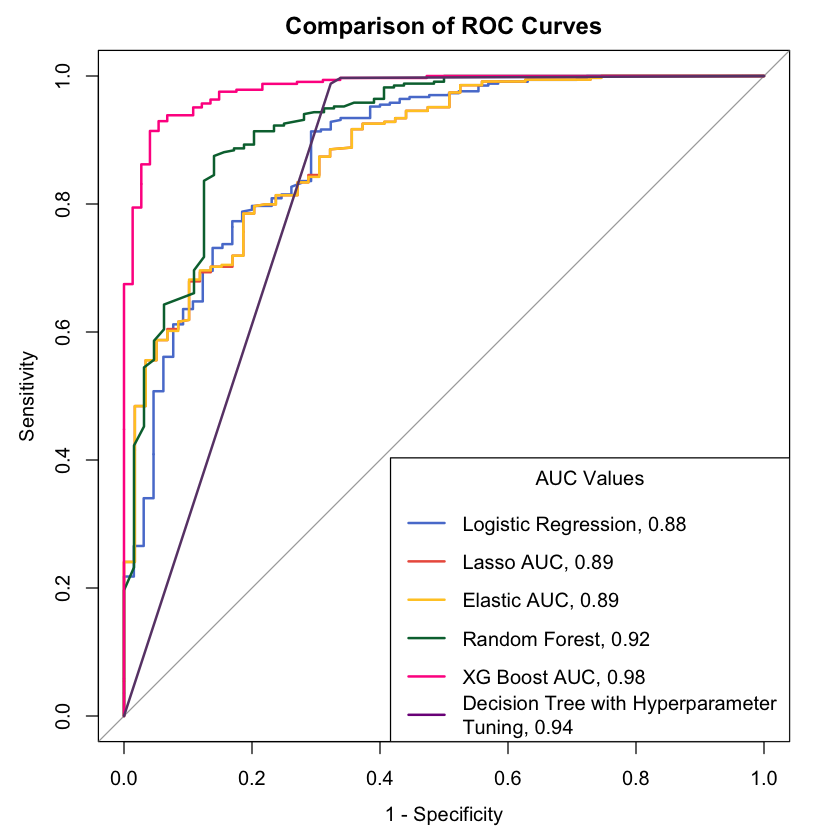

In [30]:
library(pROC)

pred_probs <- predict(xgb_model, xgb_test)
# Compute ROC curve

roc_curve_xg <- roc(y_test, pred_probs)

auc_xg <- round(auc(roc_curve_xg), 2)

# Add AUC
auc_lr <- paste("Logistic Regression,", auc_lr)
auc_lasso <- paste("Lasso AUC,", auc_lasso)
auc_elastic <- paste("Elastic AUC,", auc_elastic)
auc_decision <- paste("Decision Tree with Hyperparameter \nTuning,", auc_decision)
auc_random <- paste("Random Forest,", auc_random)
auc_xg <- paste("XG Boost AUC,", auc_xg)

# Including Prof Nakul's comment to adjust x-axis correctly
#ggroc(roc_curve_lr, legacy.axes = T)

# Plot ROC curve
plot(roc_curve_lr, legacy.axes = T, main = "Comparison of ROC Curves", col = "#597fd2")
plot(roc_curve_lasso, legacy.axes = T, main = "Comparison of ROC Curves", col = "#ec5f4c", lwd = 2, add=TRUE)
plot(roc_curve_elastic, legacy.axes = T, main = "Comparison of ROC Curves", col = "#ffc929", add=TRUE)
plot(roc_curve_random, legacy.axes = T, main = "Comparison of ROC Curves", col = "#006f3c", add=TRUE)
plot(roc_curve_xg, legacy.axes = T, main = "Comparison of ROC Curves", col = "#ff0090", add=TRUE)
plot(roc_curve_decision, legacy.axes = T, main = "Comparison of ROC Curves", col = "#6a4477", add=TRUE)


# Add Legend
legend("bottomright", title="AUC Values", legend = c(auc_lr, auc_lasso, auc_elastic, auc_random, auc_xg,  auc_decision), col = c("#597fd2", "#ec5f4c", "#ffc929", "#006f3c", "#ff0090", "#7d1189"), lty = 1, lwd = 2, bg = rgb(1, 1, 1, alpha = 0.7))


## XG Boost Tree Plot

In [31]:
# load libraries
library(xgboost)
library(caret)
library(dplyr)
library(DiagrammeR)


# plot the first tree
tree_plot <- xgb.plot.tree(model = xgb_model, trees = 3)
print(tree_plot)

In [32]:
# create plot object of XGBoost tree
tree_plot <- xgb.plot.tree(model = xgb_model, trees = 3, plot_width = 1000, 
                           plot_height = 1000, render = FALSE)

# export plot object to file
export_graph(tree_plot, "xgboost_tree_plot.pdf", width = 1000, height = 1000)

roc_curve <- roc(y_test, pred_probs)

# Plot ROC curve
plot(roc_curve, main = "ROC Curve", col = "blue")

auc_value <- auc(roc_curve)
cat(sprintf("AUC: %f", auc_value))

ERROR: [1m[33mError[39m in `export_graph()`:[22m
[1m[22m[33m![39m The packages "DiagrammeRsvg" and "rsvg" are required to produce a PDF
  file.


## Variable Importance for XGBoost

In [ ]:
# Get variable importance
importance <- xgb.importance(model = xgb_model)

# Print the variable importance
print(importance)

                     Feature         Gain        Cover    Frequency
 1:             Paid_in_Taka 0.5612330288 0.2414881768 0.1472964574
 2:           Wage_Last_Head 0.0609914469 0.0679072500 0.1202610317
 3:      Monthly_Remittances 0.0529529219 0.1133333039 0.0733374767
 4:         Duration_of_stay 0.0495385629 0.1159481241 0.0978868863
 5: Livelihood_Occupation_17 0.0446480903 0.0746981992 0.0540708515
 6:       Age_First_Marriage 0.0415233500 0.0804492824 0.0876320696
 7:          Wage_First_Head 0.0350530518 0.0580184588 0.0798632691
 8:           Rent_per_Month 0.0304779481 0.0504952772 0.0649471722
 9:          Monthly_Savings 0.0177077918 0.0226183753 0.0385332505
10:              Food_budget 0.0164503521 0.0300356659 0.0413300186
11:             Number_Trips 0.0127972706 0.0209860825 0.0267246737
12:        Education_Level_8 0.0107921067 0.0229505020 0.0248601616
13:      Saving_brought_Home 0.0102594648 0.0157722135 0.0208203853
14:       Can_write_letter_2 0.0097427315 0.0184

In [ ]:
p=0.94
r=0.98
f = 2 * (p * r) / (p + r)
print(f)

[1] 0.9595833
